In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import PIL
import cv2
import numpy as np
import pathlib

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
_path_url = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [5]:
path_url = pathlib.Path(_path_url)
list(path_url.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/9298314004_c1a8146521.jpg'),
 PosixPath('datasets/flower_photos/roses/22679076_bdb4c24401_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15712574834_2f121c7cf9_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6864417932_36fa4ceecf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14943194730_f48b4d4547_n.jpg')]

In [6]:
str(list(path_url.glob('*/*.jpg'))[0])

'datasets/flower_photos/roses/9298314004_c1a8146521.jpg'

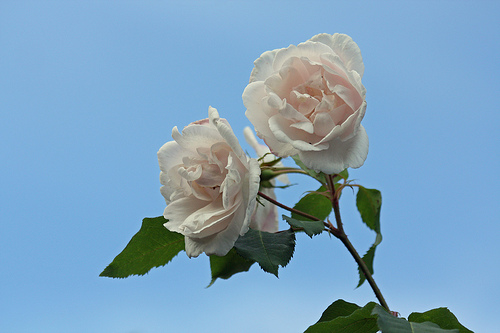

In [8]:
PIL.Image.open(list(path_url.glob('*/*.jpg'))[5])

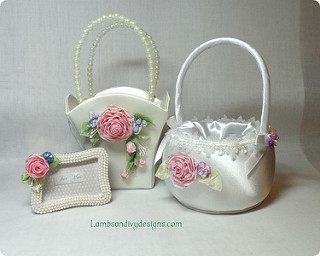

In [9]:
PIL.Image.open(list(path_url.glob('roses/*.jpg'))[6])

In [10]:
image_paths = {
    'daisy': list(path_url.glob('daisy/*.jpg')),
    'dandelion': list(path_url.glob('dandelion/*.jpg')),
    'roses': list(path_url.glob('roses/*.jpg')),
    'sunflowers': list(path_url.glob('sunflowers/*.jpg')),
    'tulips': list(path_url.glob('tulips/*.jpg'))
}

image_labels = {
    'daisy':0,
    'dandelion':1,
    'roses':2,
    'sunflowers':3,
    'tulips':4
}

In [11]:
X,y = [], []

for image_name, images in image_paths.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img, (180,180))

        X.append(resized_image)
        y.append(image_labels[image_name])

In [12]:
X,y = np.array(X),np.array(y)

In [ ]:
X.shape

(3670, 180, 180, 3)

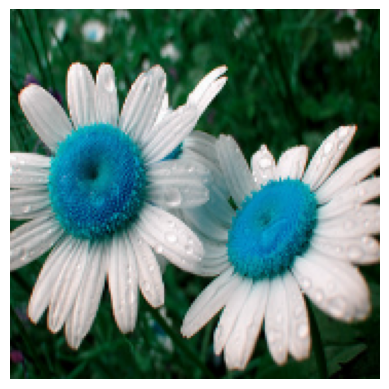

In [13]:
def plot_image(X,index):
    plt.axis('off')
    plt.imshow(X[index])

plot_image(X,0)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0, test_size = 0.2)

In [15]:
X_train[:5],y_train[:5]

(array([[[[  1,  13,  25],
          [  1,  14,  28],
          [  1,  17,  30],
          ...,
          [  0,  22,  37],
          [  0,  20,  34],
          [  0,  16,  29]],
 
         [[  1,  13,  25],
          [  1,  15,  28],
          [  0,  18,  31],
          ...,
          [  0,  23,  37],
          [  1,  21,  37],
          [  1,  18,  31]],
 
         [[  0,  13,  25],
          [  0,  16,  29],
          [  0,  18,  31],
          ...,
          [  0,  24,  40],
          [  0,  23,  38],
          [  0,  19,  32]],
 
         ...,
 
         [[  0,   8,  17],
          [  1,   1,   4],
          [  1,   1,   1],
          ...,
          [  1,   3,   3],
          [  0,   2,   1],
          [  0,   1,   1]],
 
         [[  0,   8,  18],
          [  0,   4,  11],
          [  1,   2,   2],
          ...,
          [  0,   2,   3],
          [  0,   1,   1],
          [  0,   1,   1]],
 
         [[  0,   8,  19],
          [  4,  16,  32],
          [  1,   7,  14],
   

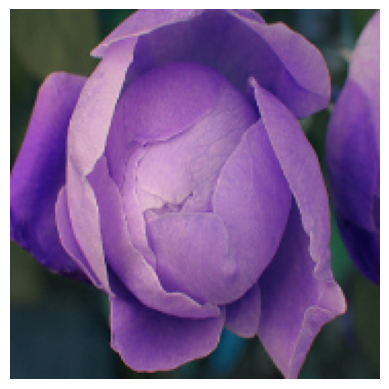

In [16]:
plot_image(X_train,4)

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [18]:
X_train_scaled

array([[[[0.00392157, 0.05098039, 0.09803922],
         [0.00392157, 0.05490196, 0.10980392],
         [0.00392157, 0.06666667, 0.11764706],
         ...,
         [0.        , 0.08627451, 0.14509804],
         [0.        , 0.07843137, 0.13333333],
         [0.        , 0.0627451 , 0.11372549]],

        [[0.00392157, 0.05098039, 0.09803922],
         [0.00392157, 0.05882353, 0.10980392],
         [0.        , 0.07058824, 0.12156863],
         ...,
         [0.        , 0.09019608, 0.14509804],
         [0.00392157, 0.08235294, 0.14509804],
         [0.00392157, 0.07058824, 0.12156863]],

        [[0.        , 0.05098039, 0.09803922],
         [0.        , 0.0627451 , 0.11372549],
         [0.        , 0.07058824, 0.12156863],
         ...,
         [0.        , 0.09411765, 0.15686275],
         [0.        , 0.09019608, 0.14901961],
         [0.        , 0.0745098 , 0.1254902 ]],

        ...,

        [[0.        , 0.03137255, 0.06666667],
         [0.00392157, 0.00392157, 0.01568627]

In [35]:
cnn = keras.Sequential([
    keras.layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3, padding = 'same', activation = 'relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(5)
])

cnn.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

cnn.fit(X_train_scaled,y_train, epochs = 30)

Epoch 1/30
92/92 [==============================] - 4s 24ms/step - loss: 1.2941 - accuracy: 0.4510
Epoch 2/30
92/92 [==============================] - 2s 27ms/step - loss: 1.0016 - accuracy: 0.6100
Epoch 3/30
92/92 [==============================] - 2s 22ms/step - loss: 0.8500 - accuracy: 0.6730
Epoch 4/30
92/92 [==============================] - 2s 21ms/step - loss: 0.6680 - accuracy: 0.7422
Epoch 5/30
92/92 [==============================] - 2s 24ms/step - loss: 0.4956 - accuracy: 0.8151
Epoch 6/30
92/92 [==============================] - 2s 23ms/step - loss: 0.2865 - accuracy: 0.8995
Epoch 7/30
92/92 [==============================] - 2s 21ms/step - loss: 0.1464 - accuracy: 0.9567
Epoch 8/30
92/92 [==============================] - 2s 21ms/step - loss: 0.0945 - accuracy: 0.9717
Epoch 9/30
92/92 [==============================] - 2s 21ms/step - loss: 0.0695 - accuracy: 0.9809
Epoch 10/30
92/92 [==============================] - 2s 21ms/step - loss: 0.0524 - accuracy: 0.9864
Epoch 11/

In [36]:
cnn.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 0s 12ms/step - loss: 2.9107 - accuracy: 0.6431


[2.9106991291046143, 0.6430517435073853]

In [27]:
len(y_train)

2936

In [28]:
y_train

array([1, 4, 0, ..., 2, 3, 3])

In [37]:
np.argmax(cnn.predict(X_test)[1])

23/23 [==============================] - 0s 6ms/step


0

In [31]:
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [32]:
model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3, padding = 'same', activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(5)
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

model.fit(X_train_scaled,y_train, epochs = 30)

Epoch 1/30
92/92 [==============================] - 8s 37ms/step - loss: 1.2869 - accuracy: 0.4653
Epoch 2/30
92/92 [==============================] - 3s 34ms/step - loss: 1.0226 - accuracy: 0.5981
Epoch 3/30
92/92 [==============================] - 4s 39ms/step - loss: 0.9260 - accuracy: 0.6424
Epoch 4/30
92/92 [==============================] - 3s 36ms/step - loss: 0.8436 - accuracy: 0.6764
Epoch 5/30
92/92 [==============================] - 3s 34ms/step - loss: 0.8078 - accuracy: 0.6788
Epoch 6/30
92/92 [==============================] - 3s 31ms/step - loss: 0.7656 - accuracy: 0.7040
Epoch 7/30
92/92 [==============================] - 3s 30ms/step - loss: 0.7138 - accuracy: 0.7272
Epoch 8/30
92/92 [==============================] - 3s 32ms/step - loss: 0.6804 - accuracy: 0.7388
Epoch 9/30
92/92 [==============================] - 3s 29ms/step - loss: 0.6410 - accuracy: 0.7520
Epoch 10/30
92/92 [==============================] - 3s 29ms/step - loss: 0.6164 - accuracy: 0.7657
Epoch 11/

In [34]:
model.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 0s 12ms/step - loss: 0.9392 - accuracy: 0.7330


[0.9392169713973999, 0.7329699993133545]

In [46]:
predictions = model.predict(X_test_scaled)

23/23 [==============================] - 0s 10ms/step


In [47]:
np.argmax(predictions[10])

1

In [48]:
y_test[10]

1

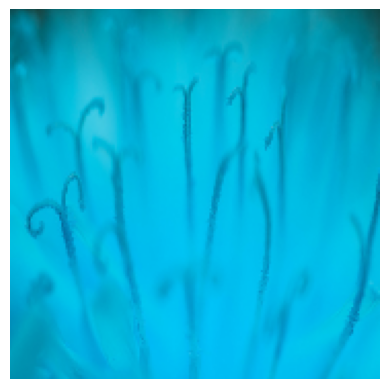

In [50]:
plot_image(X_test_scaled,10)

In [51]:
np.argmax(predictions[20])

2

In [52]:
y_test[20]

2

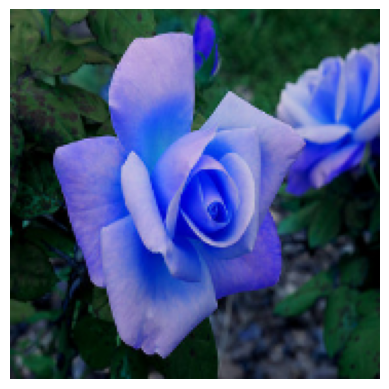

In [53]:
plot_image(X_test_scaled,20)

In [72]:
def get_label(dictionary, value):
  for key,val in dictionary.items():
    if value == val:
      return key

  return None


In [74]:
print(get_label(image_labels,2))

roses


In [80]:
def predict(_predictions,index,show_image = True):
  real_prediction = np.argmax(_predictions[index])
  label = get_label(image_labels,real_prediction)

  if show_image:
    plot_image(X_test_scaled,index)

  return {
      'Predicted_Class':real_prediction,
      'Predicted_label':label
  }

{'Predicted_Class': 2, 'Predicted_label': 'roses'}


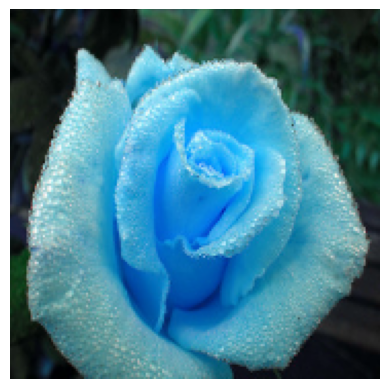

In [86]:
print(predict(predictions,700))